# Road Accidents 2022


*   By **Khashayar Mohamadi**
*   Linkdin : [@khashayar-mohammadi](https://www.linkedin.com/in/khashayar-mohamadi-3850b627a?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BuMGk98fFRtSG%2B5GNZDpHKA%3D%3D)
*   Github :   [@khashayarM7](https://github.com/khashayarM7)




"**Road Accidents Dataset**":

Description:
This comprehensive dataset provides detailed information on road accidents reported over multiple years. The dataset encompasses various attributes related to accident status, vehicle and casualty references, demographics, and severity of casualties. It includes essential factors such as pedestrian details, casualty types, road maintenance worker involvement, and the Index of Multiple Deprivation (IMD) decile for casualties' home areas.

# Data Analysis

**Import Libraries**

In [ ]:
import time
print('load Libraries ...',end = '')
t0 = time.time()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import folium
from sklearn.preprocessing import LabelEncoder
from geopy.geocoders import Nominatim
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
warnings.filterwarnings('ignore')
print('Done. in', round(time.time()-t0,3), 'Seconds')


load Libraries ...Done. in 2.103 Seconds


***Load Dataset***

In [ ]:
print('load Dataset...',end = '')
t0 = time.time()
csv_file_path = "/content/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv"
df = pd.read_csv(csv_file_path)
print("First few rows of the CSV file:")
print('Done. in', round(time.time()-t0,3), 'Seconds')
df.head()

load Dataset...First few rows of the CSV file:
Done. in 0.16 Seconds


,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


In [ ]:
print('load Dataset ...',end = '')
t0 = time.time()
xlsx_file_path = "/content/dft_road_casualty_statistics_road_safety_open_dataset_data_guide.xlsx"
df_guide = pd.read_excel(xlsx_file_path)
print('Done. in', round(time.time()-t0,3), 'Seconds')
print("First few rows of the Excel file:")
df_guide.head()

load Dataset ...Done. in 0.434 Seconds
First few rows of the Excel file:


,table,field name,code/format,label,note
0,Accident,collision_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,collision_year,NaN,NaN,NaN
2,Accident,collision_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
4,Accident,accident_year,NaN,NaN,NaN


***Data Mapping and Transformation***:
Mappings from the supplementary data are applied to the primary dataset to enhance interpretability and completeness. This involves replacing specific codes with meaningful labels.

In [ ]:
print('load Dataset ...',end = '')
t0 = time.time()
apply_mappings_replace_nan = lambda df, mappings: \
    df.assign(**{
        col_name: df[col_name].replace(-1, np.nan).map(
            mappings[mappings['field name'] == col_name]
            .assign(**{'code/format': pd.to_numeric(mappings['code/format'], errors='coerce')})
            .dropna(subset=['code/format'])
            .set_index('code/format')['label']
            .to_dict()
        ).fillna(df[col_name])
        for col_name in mappings.loc[mappings['code/format'].notnull(), 'field name'].unique()
        if col_name in df.columns
    })
df_mapped = apply_mappings_replace_nan(df, df_guide)
print('Done. in', round(time.time()-t0,3), 'Seconds')
print("First few rows of the mapped DataFrame:")
df_mapped.head()

load Dataset ...Done. in 0.263 Seconds
First few rows of the mapped DataFrame:


,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,Driver or rider,Female,46,46 - 55,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,Driver or rider,Male,30,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 10-20%,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,Driver or rider,Female,58,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,Driver or rider,Female,78,Over 75,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,Driver or rider,Male,63,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 30-40%,W01000578


In [ ]:
mapped_csv_file_path = "/content/mapped_data.csv"
df_mapped.to_csv(mapped_csv_file_path, index=False)
print("Mapped DataFrame saved to CSV file:", mapped_csv_file_path)


Mapped DataFrame saved to CSV file: /content/mapped_data.csv


In [ ]:
df = df_mapped
df.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,Driver or rider,Female,46,46 - 55,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,Driver or rider,Male,30,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 10-20%,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,Driver or rider,Female,58,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,Driver or rider,Female,78,Over 75,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,Driver or rider,Male,63,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 30-40%,W01000578


# Data Cleansing and Preprocessing:
Missing values are addressed, and summary statistics are computed to understand the dataset's distributional properties.

In [ ]:
# Define a function to replace -1 with pd.NA
def replace_negative_one(value):
    return pd.NA if value == -1 else value

# Apply the function to the DataFrame
df[::] = df[::].applymap(replace_negative_one)

# Check DataFrame info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   status                              61352 non-null  object
 1   accident_index                      61352 non-null  object
 2   accident_year                       61352 non-null  int64 
 3   accident_reference                  61352 non-null  object
 4   vehicle_reference                   61352 non-null  int64 
 5   casualty_reference                  61352 non-null  int64 
 6   casualty_class                      61352 non-null  object
 7   sex_of_casualty                     60904 non-null  object
 8   age_of_casualty                     60002 non-null  object
 9   age_band_of_casualty                60002 non-null  object
 10  casualty_severity                   61352 non-null  object
 11  pedestrian_location                 61352 non-null  ob


# Columns:

**Status:** The status of the accident (e.g., reported, under investigation).

**Accident_Index:** A unique identifier for each reported accident.

**Accident_Year:** The year in which the accident occurred.

**Accident_Reference:** A reference number associated with the accident.

**Vehicle_Reference: **A reference number for the involved vehicle in the accident.

**Casualty_Reference:** A reference number for the casualty involved in the accident.

**Casualty_Class:** Indicates the class of the casualty (e.g., driver, passenger, pedestrian).

**Sex_of_Casualty:** The gender of the casualty (male or female).

**Age_of_Casualty:** The age of the casualty.

**Age_Band_of_Casualty:** Age group to which the casualty belongs (e.g., 0-5, 6-10, 11-15).

**Casualty_Severity:** The severity of the casualty's injuries (e.g., fatal, serious, slight).

**Pedestrian_Location:** The location of the pedestrian at the time of the accident.

**Pedestrian_Movement:** The movement of the pedestrian during the accident.

**Car_Passenger:** Indicates whether the casualty was a car passenger at the time of the accident (yes or no).

**Bus_or_Coach_Passenger:** Indicates whether the casualty was a bus or coach passenger (yes or no).

**Pedestrian_Road_Maintenance_Worker:** Indicates whether the casualty was a road maintenance worker (yes or no).

**Casualty_Type:** The type of casualty (e.g., driver/rider, passenger, pedestrian).

**Casualty_Home_Area_Type**: The type of area in which the casualty resides (e.g., urban, rural).

C**asualty_IMD_Decile:** The IMD decile of the area where the casualty resides (a measure of deprivation).

**LSOA_of_Casualty:** The Lower Layer Super Output Area (LSOA) associated with the casualty's location.



In [ ]:
df.describe()

,accident_year,vehicle_reference,casualty_reference
count,61352.0,61352.000000,61352.000000
mean,2022.0,1.450368,1.333779
std,0.0,1.109855,0.981507
min,2022.0,1.000000,1.000000
25%,2022.0,1.000000,1.000000
50%,2022.0,1.000000,1.000000
75%,2022.0,2.000000,1.000000
max,2022.0,227.000000,148.000000


In [ ]:
missing_values = df.isnull().sum()

print("missing_values is:")
print(missing_values)

missing_values is:
status                                   0
accident_index                           0
accident_year                            0
accident_reference                       0
vehicle_reference                        0
casualty_reference                       0
casualty_class                           0
sex_of_casualty                        448
age_of_casualty                       1350
age_band_of_casualty                  1350
casualty_severity                        0
pedestrian_location                      0
pedestrian_movement                      0
car_passenger                          314
bus_or_coach_passenger                  23
pedestrian_road_maintenance_worker     113
casualty_type                            5
casualty_home_area_type               5498
casualty_imd_decile                   5784
lsoa_of_casualty                         0
dtype: int64


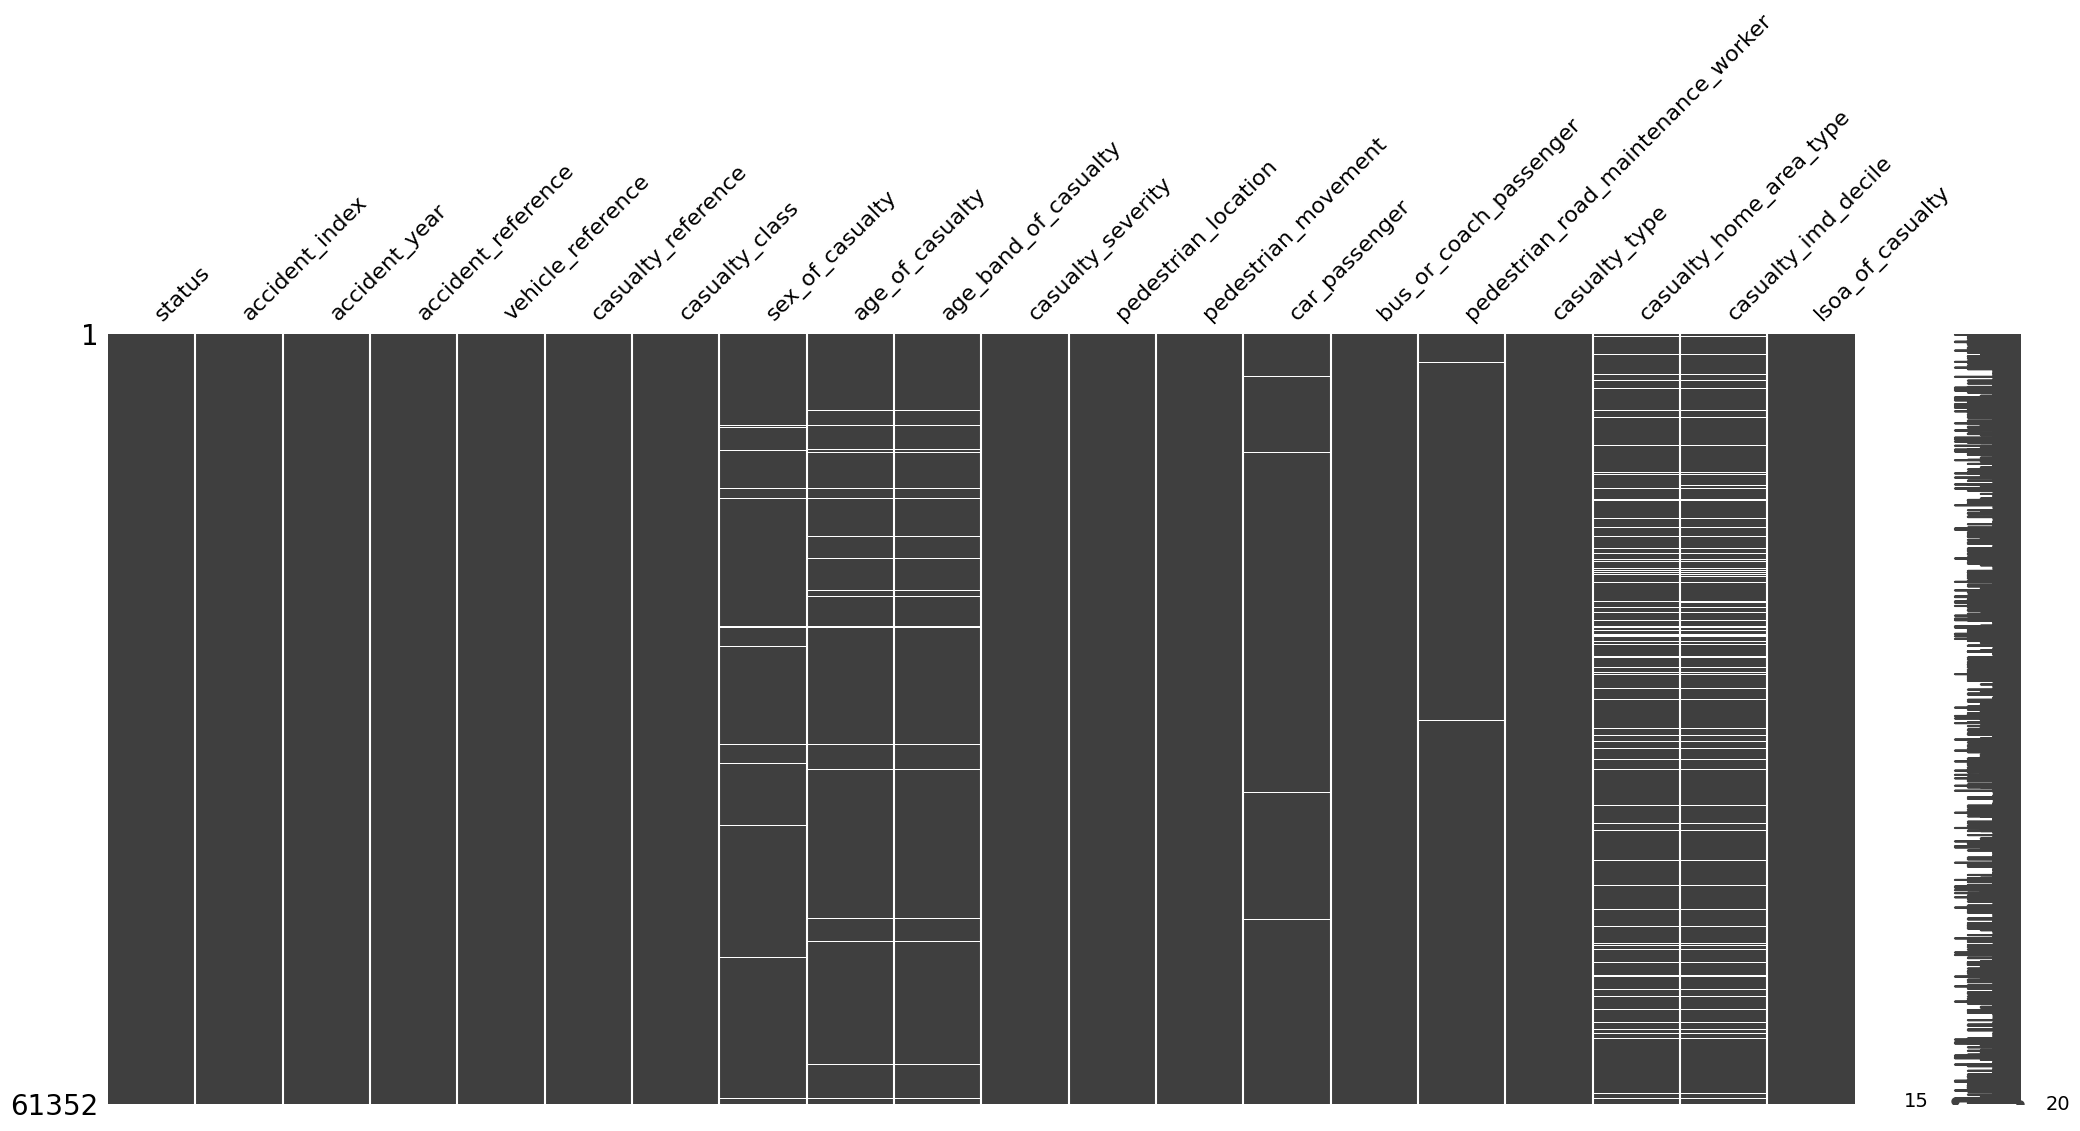

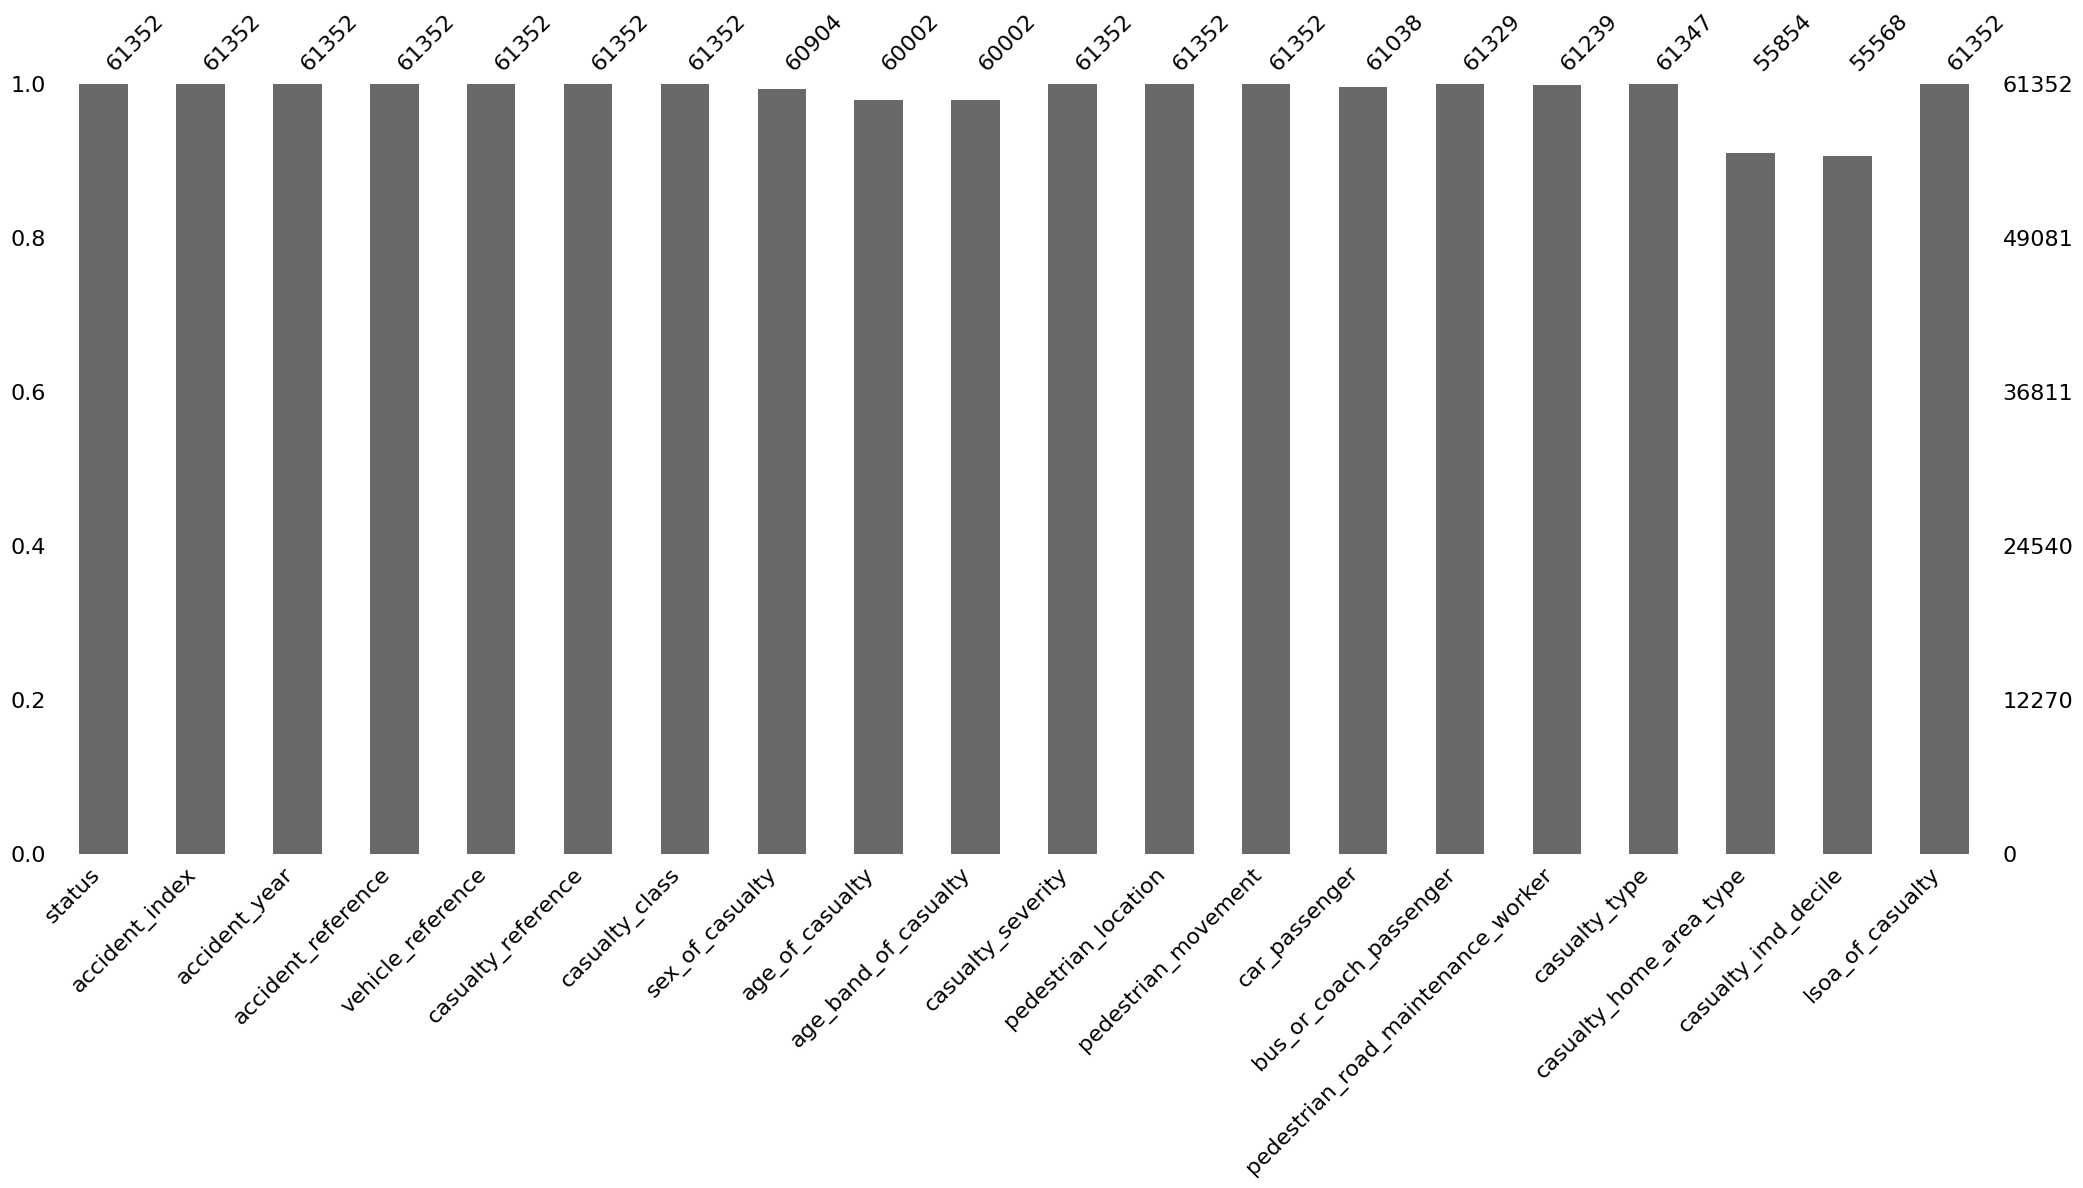

In [ ]:
msn.matrix(df)
plt.show()

msn.bar(df)
plt.show()

# Exploratory Data Analysis (EDA):
Visualization techniques are employed to examine missing data patterns, feature distributions, and unique value counts, aiding in understanding data characteristics.

In [ ]:
for column in df.columns:
    num_unique_values = df[column].nunique()
    data_type = df[column].dtype

    print(f"Feature: {column}")
    print(f"Number of Unique Classifications: {num_unique_values}")
    print(f"Data Type: {data_type}")

    if num_unique_values <= 10:
        print("Classifications and Counts:")
        print(df[column].value_counts())

    print("\n" + "="*30 + "\n")

Feature: status
Number of Unique Classifications: 1
Data Type: object
Classifications and Counts:
Unvalidated    61352
Name: status, dtype: int64


Feature: accident_index
Number of Unique Classifications: 48283
Data Type: object


Feature: accident_year
Number of Unique Classifications: 1
Data Type: int64
Classifications and Counts:
2022    61352
Name: accident_year, dtype: int64


Feature: accident_reference
Number of Unique Classifications: 48283
Data Type: object


Feature: vehicle_reference
Number of Unique Classifications: 11
Data Type: int64


Feature: casualty_reference
Number of Unique Classifications: 18
Data Type: int64


Feature: casualty_class
Number of Unique Classifications: 3
Data Type: object
Classifications and Counts:
Driver or rider    40702
Passenger          11710
Pedestrian          8940
Name: casualty_class, dtype: int64


Feature: sex_of_casualty
Number of Unique Classifications: 3
Data Type: object
Classifications and Counts:
Male                       37452
F

In [ ]:
def show_info(df, column_name: str, sort=True, plot=True):
    unique_value_number = df[column_name].nunique()
    unique_value_counts = df[column_name].value_counts()

    if sort:
        filtered_for_plot = df.groupby(column_name)[column_name].size().sort_values(ascending=False)
    else:
        filtered_for_plot = df.groupby(column_name)[column_name].size()

    print(f'{column_name} has {unique_value_number} Unique Values:\n{unique_value_counts}\n')

    if plot:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=filtered_for_plot.index, y=filtered_for_plot, palette='viridis')
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Number of occurrences of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

sex_of_casualty has 2 Unique Values:
Male      37452
Female    23442
Name: sex_of_casualty, dtype: int64



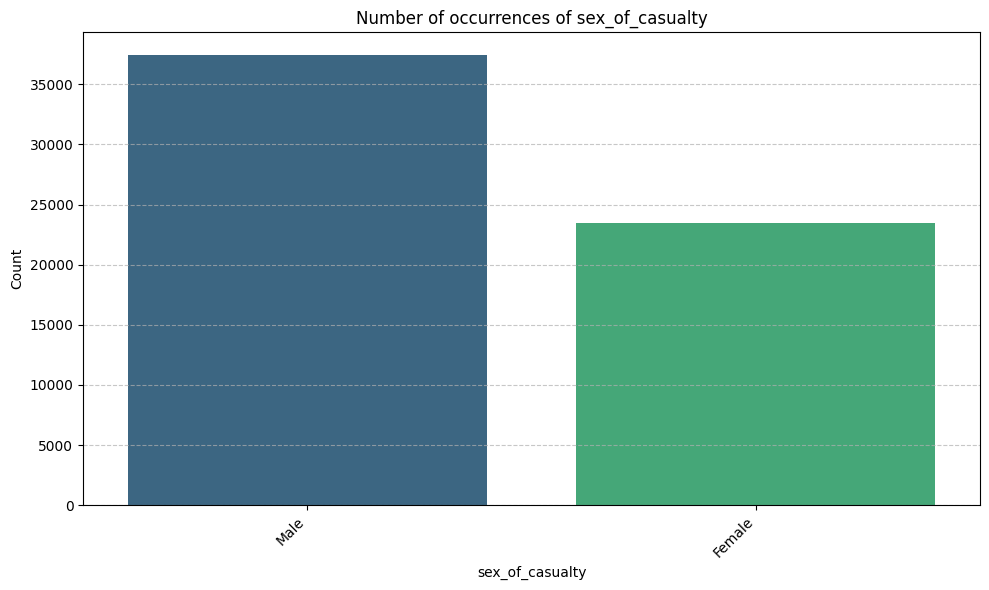

In [ ]:
df = df.dropna(subset=['sex_of_casualty'])
df = df[df['sex_of_casualty'] != 'unknown (self reported)']
column_name = 'sex_of_casualty'
show_info(df, column_name)


In [ ]:
def handle_missing_data(df, column_name):
    # Drop rows with missing values in the specified column
    df_cleaned = df.dropna(subset=[column_name])
    return df_cleaned

def analyze_age_of_casualty(df, column_name):
    # Descriptive statistics
    mean_age = df[column_name].mean()
    median_age = df[column_name].median()
    mode_age = df[column_name].mode().iloc[0]
    std_age = df[column_name].std()

    # Distribution visualization
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], kde=True)
    plt.title('Distribution of Age of Casualty')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Age groups
    age_bins = [0, 18, 30, 45, 60, np.inf]
    age_labels = ['0-18', '19-30', '31-45', '46-60', '61+']
    df['age_group'] = pd.cut(df[column_name], bins=age_bins, labels=age_labels)

    # Comparison by casualty severity
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='casualty_severity', y=column_name)
    plt.title('Age Distribution by Casualty Severity')
    plt.xlabel('Casualty Severity')
    plt.ylabel('Age')
    plt.show()

In [ ]:
df['age_of_casualty'].mean(), df['age_of_casualty'].median()

(37.53237722729248, 34.0)

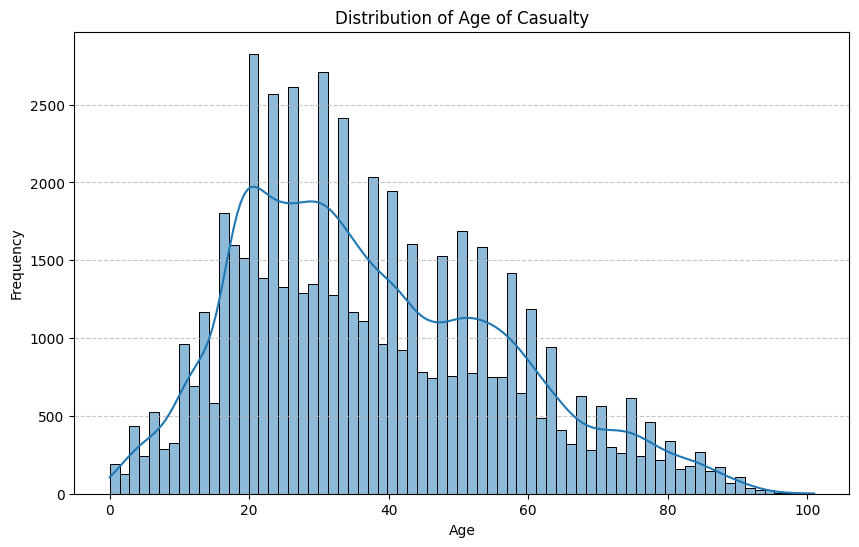

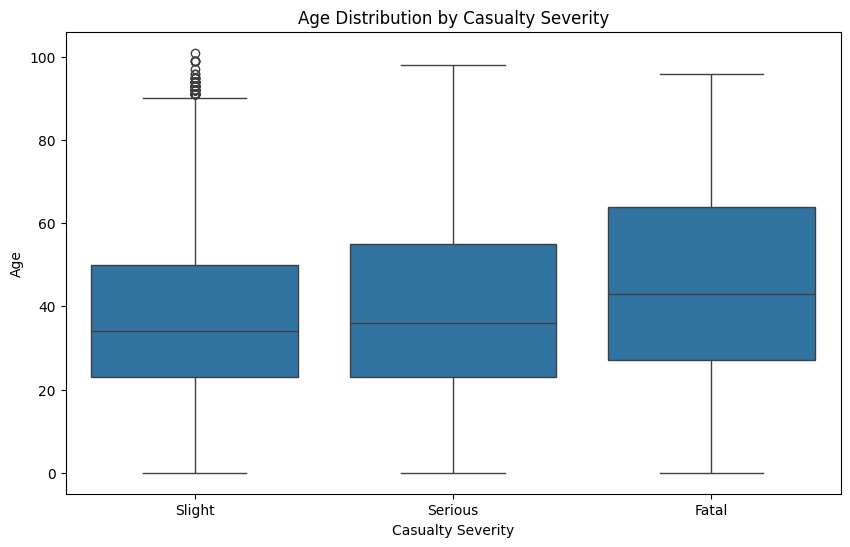

In [ ]:
# Handle missing data in 'age_of_casualty' column
df_cleaned = handle_missing_data(df, 'age_of_casualty')

# Analyze age of casualty
analyze_age_of_casualty(df_cleaned, 'age_of_casualty')

age_band_of_casualty has 11 Unique Values:
26 - 35    12814
36 - 45     9369
46 - 55     7826
21 - 25     6707
16 - 20     6318
56 - 65     5834
11 - 15     2979
66 - 75     2977
Over 75     2442
6 - 10      1567
0 - 5        993
Name: age_band_of_casualty, dtype: int64



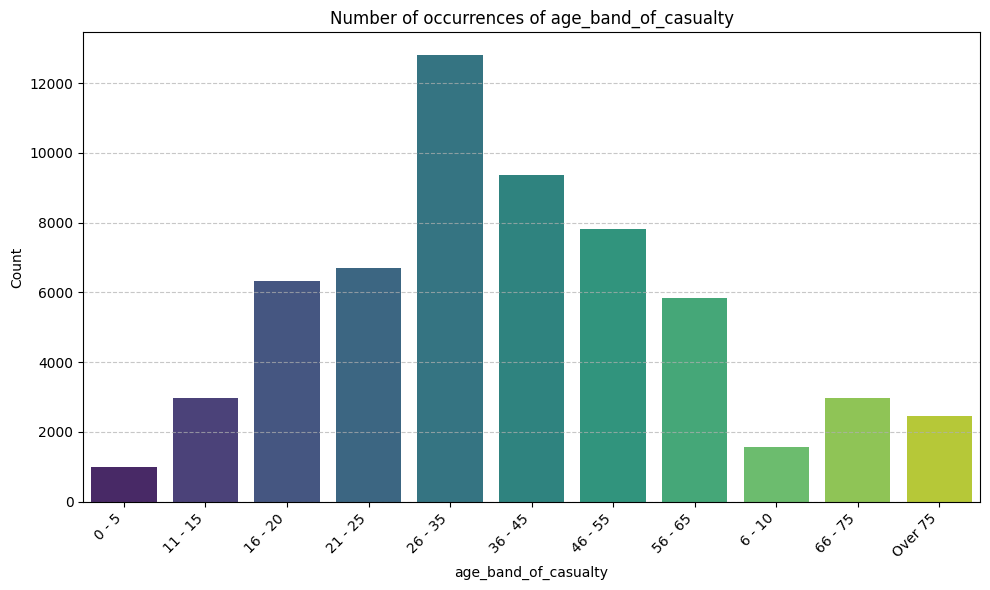

In [ ]:
show_info(df, 'age_band_of_casualty', sort=False)

In [ ]:
df['age_of_casualty'].fillna(df['age_of_casualty'].median(), inplace=True)
df['age_band_of_casualty'].fillna('26 - 35', inplace=True)

car_passenger has 3 Unique Values:
Not car passenger       51343
Front seat passenger     6057
Rear seat passenger      3494
Name: car_passenger, dtype: int64



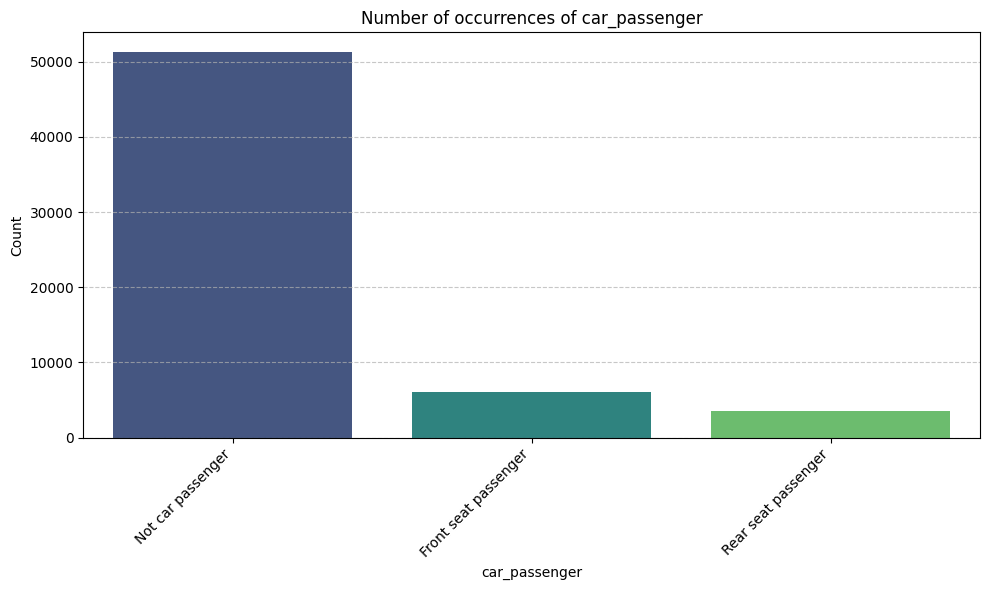

In [ ]:
df['car_passenger'].fillna('Not car passenger', inplace=True)
df.loc[df['car_passenger'] == 'unknown (self reported)', 'car_passenger'] = 'Not car passenger'
show_info(df, 'car_passenger')

bus_or_coach_passenger has 5 Unique Values:
Not a bus or coach passenger    60052
Seated passenger                  489
Standing passenger                263
Alighting                          58
Boarding                           32
Name: bus_or_coach_passenger, dtype: int64



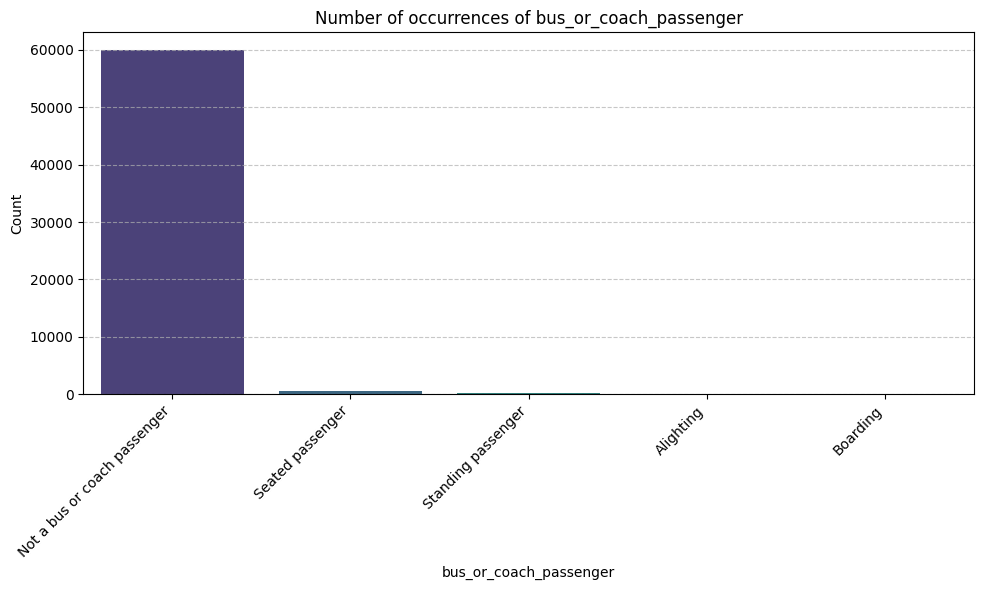

In [ ]:
df['bus_or_coach_passenger'].fillna('Not a bus or coach passenger', inplace=True)
df.loc[df['bus_or_coach_passenger'] == 'unknown (self reported)', 'bus_or_coach_passenger'] = 'Not a bus or coach passenger'
show_info(df, 'bus_or_coach_passenger')

In [ ]:
df['pedestrian_road_maintenance_worker'].fillna('No / Not applicable', inplace=True)
df.loc[df['pedestrian_road_maintenance_worker'] == 'Not Known', 'pedestrian_road_maintenance_worker'] = 'No / Not applicable'

df['casualty_type'].fillna('Car occupant', inplace=True)

pedestrian_road_maintenance_worker has 2 Unique Values:
No / Not applicable    60779
Yes                      115
Name: pedestrian_road_maintenance_worker, dtype: int64



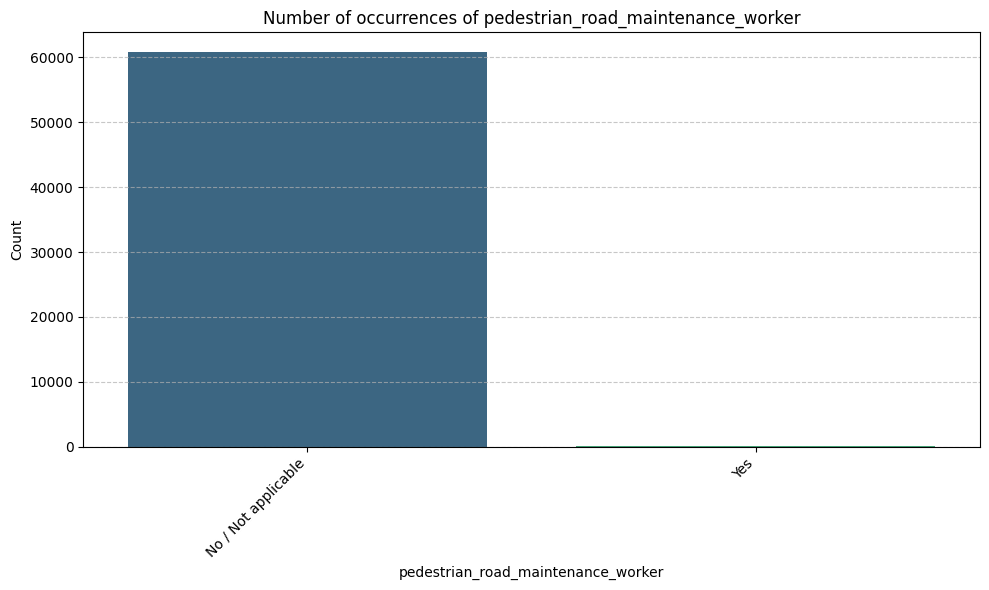

casualty_type has 21 Unique Values:
Car occupant                                                 32437
Pedestrian                                                    8919
Cyclist                                                       7078
Motorcycle 125cc and under rider or passenger                 3604
Motorcycle over 500cc rider or passenger                      1788
Van / Goods vehicle (3.5 tonnes mgw or under) occupant        1438
Bus or coach occupant (17 or more pass seats)                  964
Motorcycle - unknown cc rider or passenger                     857
Other vehicle occupant                                         824
Motorcycle over 125cc and up to 500cc rider or  passenger      819
Taxi/Private hire car occupant                                 686
Goods vehicle (unknown weight) occupant                        420
Motorcycle 50cc and under rider or passenger                   410
Goods vehicle (7.5 tonnes mgw and over) occupant               178
Electric motorcycle rider 

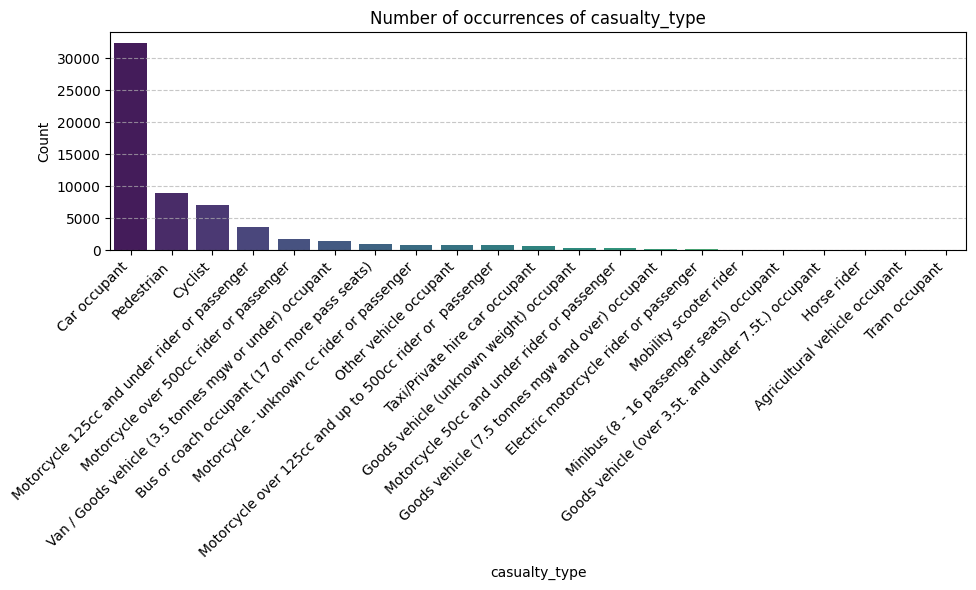

In [ ]:
show_info(df, 'pedestrian_road_maintenance_worker')
show_info(df, 'casualty_type')

casualty_home_area_type has 3 Unique Values:
Urban area    44929
Rural          5996
Small town     4575
Name: casualty_home_area_type, dtype: int64



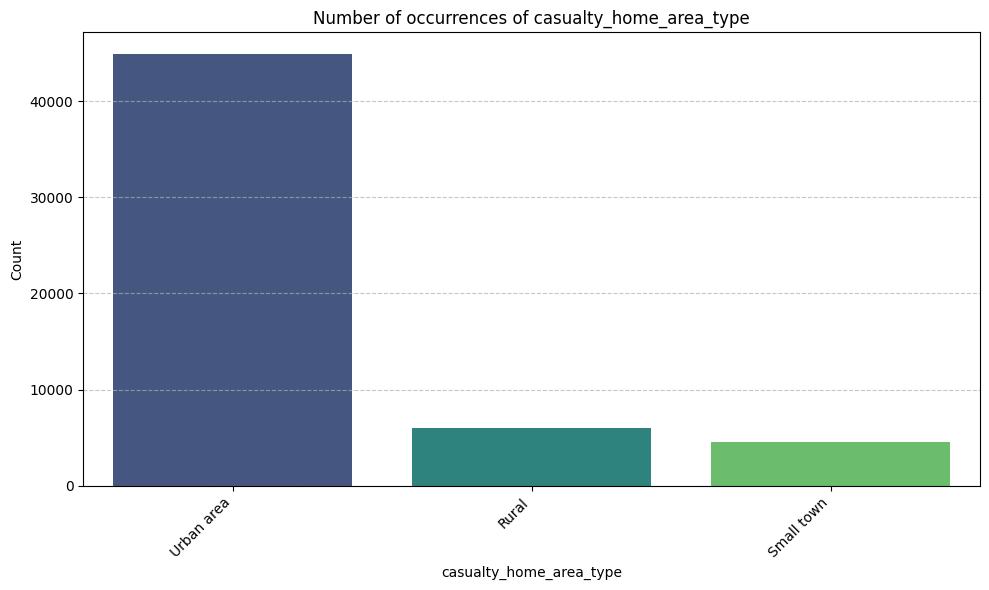

In [ ]:
# Drop NaN values from the 'casualty_home_area_type' column
df= df.dropna(subset=['casualty_home_area_type'])

# Display information about the cleaned column
show_info(df, 'casualty_home_area_type')


casualty_imd_decile has 10 Unique Values:
More deprived 10-20%    7100
Most deprived 10%       6875
More deprived 20-30%    6837
More deprived 30-40%    6222
More deprived 40-50%    5735
Less deprived 40-50%    5304
Less deprived 30-40%    4930
Less deprived 20-30%    4544
Less deprived 10-20%    4064
Least deprived 10%      3605
Name: casualty_imd_decile, dtype: int64



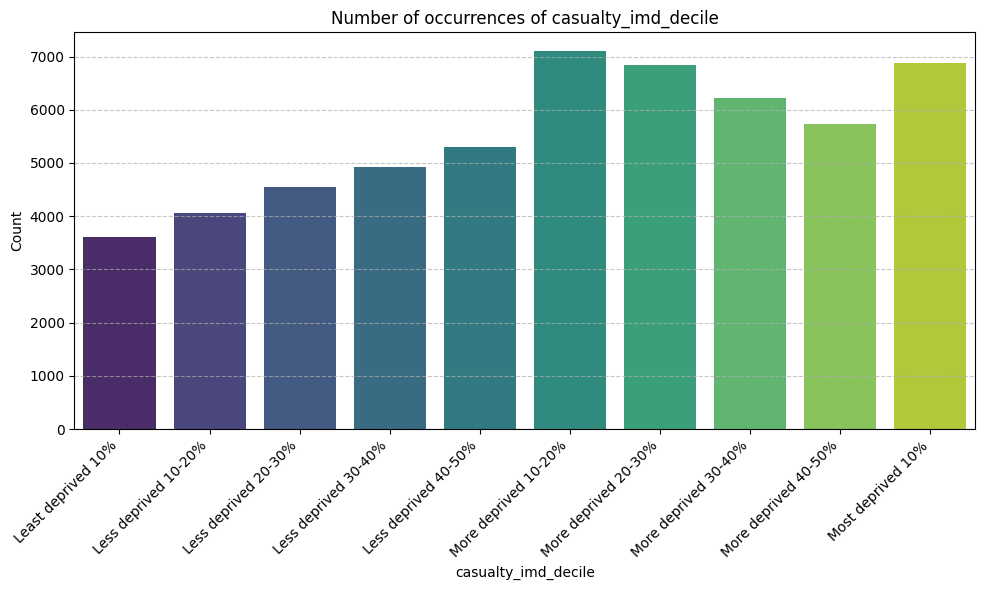

In [ ]:
df = df.dropna(subset=['casualty_imd_decile'])

# Display information about the cleaned column without sorting
show_info(df, 'casualty_imd_decile', sort=False)

In [ ]:
df.isna().sum()

status                                0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64

# Feature Analysis and Imputation:
Detailed analyses are conducted for specific features, including the age of casualties, with appropriate strategies for handling missing data and imputation.

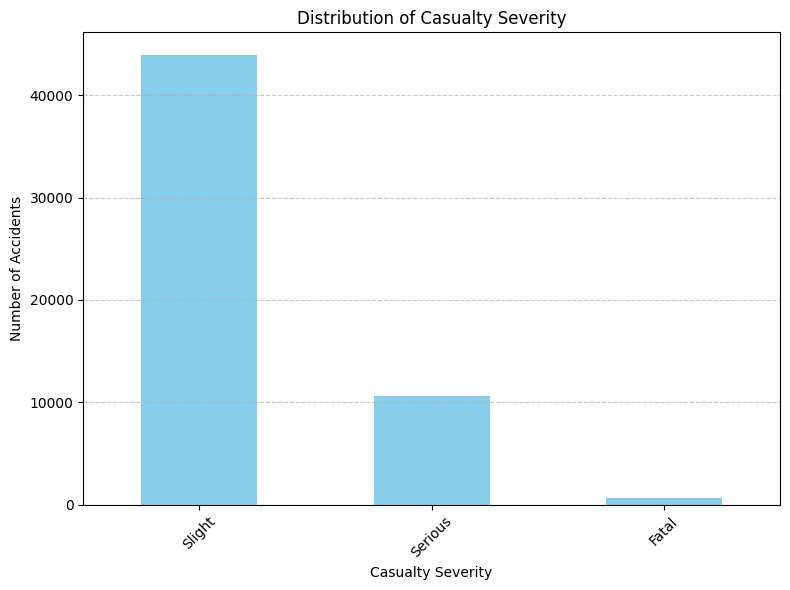

In [ ]:
# Count the occurrences of each casualty severity
severity_counts = df['casualty_severity'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
severity_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Casualty Severity')
plt.xlabel('Casualty Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 2500x1200 with 0 Axes>

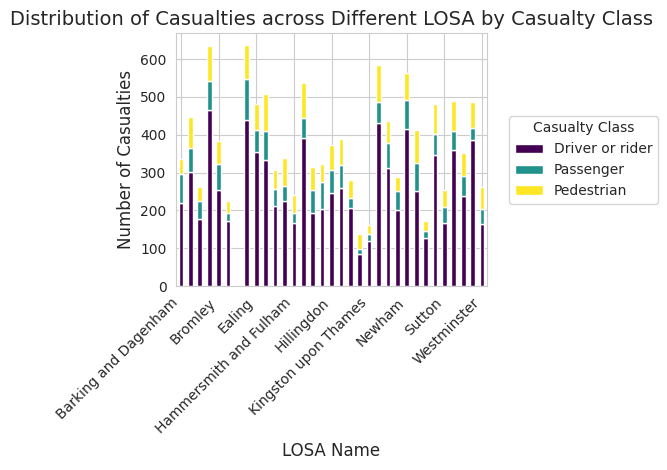

In [ ]:
# Merge the dataset with LOSA codes
loca_df = pd.read_csv('/content/LOSA_Codes.csv')
loca_df['Names'] = loca_df['Names'].str[:-5]
merged_df = pd.merge(df, loca_df, left_on='lsoa_of_casualty', right_on='Codes', how='left')

# Analyze casualty distribution across different LOSA by casualty class
grouped_data = merged_df.groupby(['Names', 'casualty_class']).size().unstack(fill_value=0)

# Set style
sns.set_style("whitegrid")

# Increase figure size
plt.figure(figsize=(25, 12))

# Plot
grouped_data.plot(kind='bar', stacked=True, cmap='viridis')

# Add labels and title
plt.xlabel('LOSA Name', fontsize=12)
plt.ylabel('Number of Casualties', fontsize=12)
plt.title('Distribution of Casualties across Different LOSA by Casualty Class', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Limit the number of labels by setting the tick frequency
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust the number as needed

# Add legend with adjusted position and title
plt.legend(title='Casualty Class', bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the total number of casualties for each LOSA
grouped_data = grouped_data.sum(axis=1)

# Convert the Series to DataFrame
grouped_data = grouped_data.reset_index()

# Rename the columns if needed
grouped_data.columns = ['Names', 'Counts']

# Display the DataFrame
grouped_data

,Names,Counts
0,Barking and Dagenham,335
1,Barnet,446
2,Bexley,261
3,Brent,634
4,Bromley,383
5,Camden,225
6,City of London,4
7,Croydon,636
8,Ealing,480
9,Enfield,508


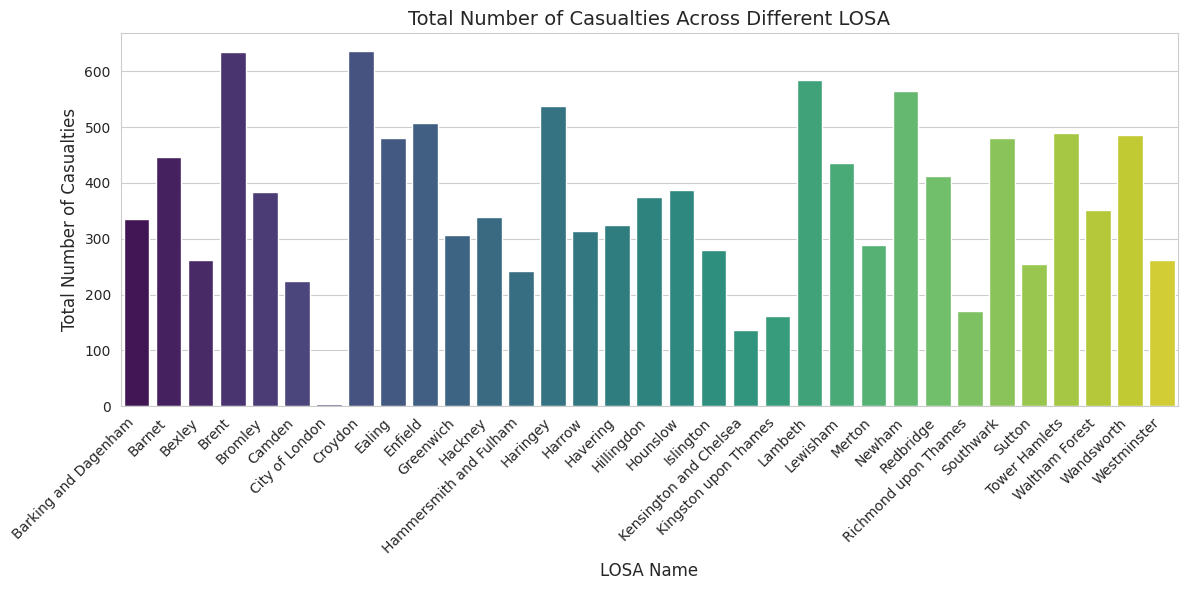

In [ ]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x='Names', y='Counts', data=grouped_data, palette='viridis')

# Add labels and title
plt.xlabel('LOSA Name', fontsize=12)
plt.ylabel('Total Number of Casualties', fontsize=12)
plt.title('Total Number of Casualties Across Different LOSA', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Function to get latitude and longitude for a town using OpenStreetMap Nominatim API
def get_coordinates(town):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(town)
    if location:
        return location.latitude, location.longitude
    else:
        print(f"Failed to get coordinates for {town}")

df_map = grouped_data
# Apply the function to each town in the DataFrame to get coordinates
df_map['Latitude'], df_map['Longitude'] = zip(*df_map['Names'].apply(get_coordinates))

# Create a folium map
m = folium.Map(location=[51.5074, -0.1278], zoom_start=9)

# Define a color palette for markers
colors = ['blue', 'green', 'red', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue',
          'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black']
# Add markers for each town with popup showing the town name and count
for _, row in df_map.iterrows():
    town = row['Names']
    frequency = row['Counts']
    color_index = min(frequency // 30, len(colors) - 1)  # Use the color index based on frequency, capped at the length of colors list
    color = colors[color_index]
    popup_text = f"{town} ({frequency})"
    folium.Marker([row['Latitude'], row['Longitude']], popup=popup_text, icon=folium.Icon(color=color)).add_to(m)
# Display the map
m.save("map__.html")  # Save the map as an HTML file

In [ ]:
m

In [ ]:
# Convert categorical columns to 'category' data type
categorical_columns = ['status', 'accident_index', 'accident_reference', 'casualty_class',
                       'sex_of_casualty', 'casualty_severity', 'pedestrian_location', 'age_band_of_casualty',
                       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
                       'pedestrian_road_maintenance_worker', 'casualty_type',
                       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty']

for column in categorical_columns:
    df[column] = df[column].astype('category')

# Check data types to confirm changes
df.dtypes

status                                category
accident_index                        category
accident_year                            int64
accident_reference                    category
vehicle_reference                        int64
casualty_reference                       int64
casualty_class                        category
sex_of_casualty                       category
age_of_casualty                        float64
age_band_of_casualty                  category
casualty_severity                     category
pedestrian_location                   category
pedestrian_movement                   category
car_passenger                         category
bus_or_coach_passenger                category
pedestrian_road_maintenance_worker    category
casualty_type                         category
casualty_home_area_type               category
casualty_imd_decile                   category
lsoa_of_casualty                      category
dtype: object

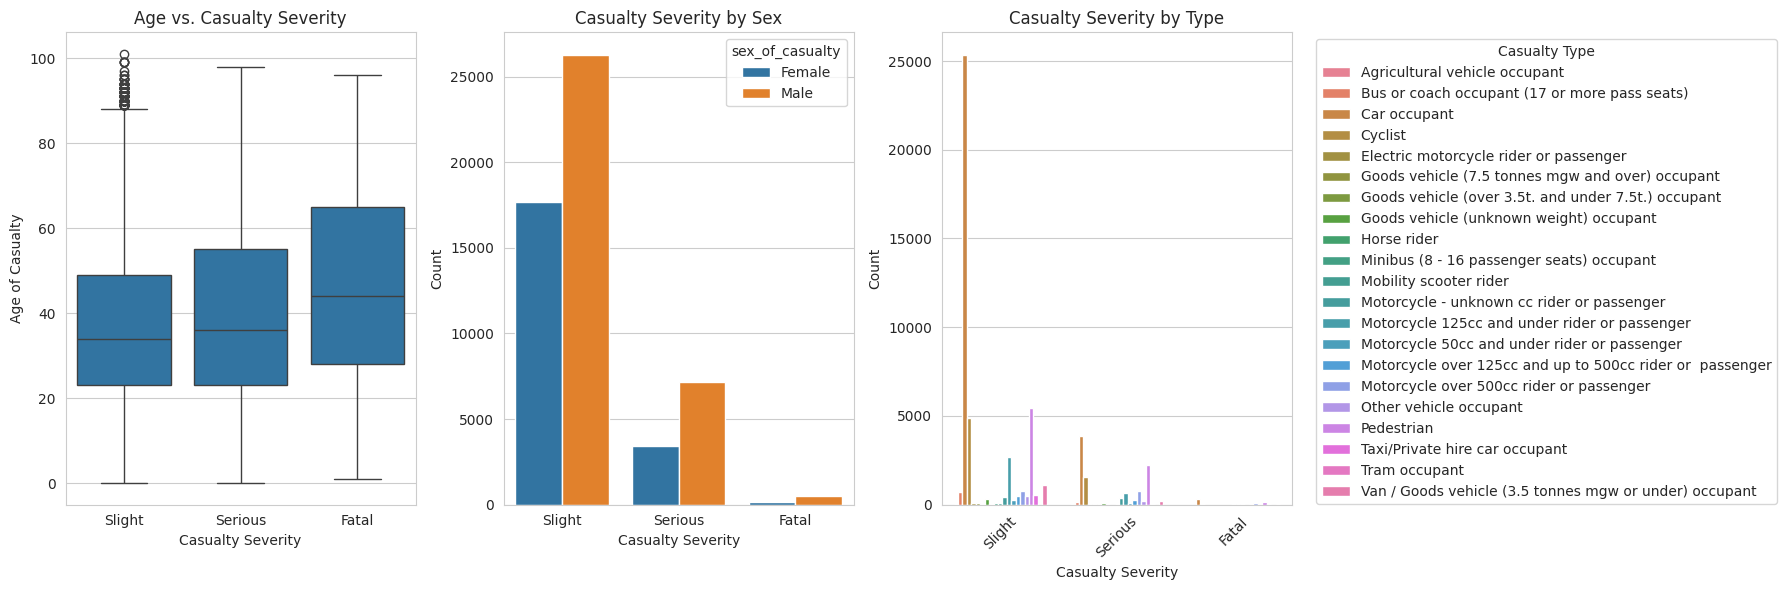

In [ ]:

# Create a figure for visualizing the relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Relationship between casualty severity and age
sns.boxplot(x='casualty_severity', y='age_of_casualty', data= df, order=['Slight', 'Serious', 'Fatal'], ax=axes[0])
axes[0].set_title('Age vs. Casualty Severity')
axes[0].set_xlabel('Casualty Severity')
axes[0].set_ylabel('Age of Casualty')

# Distribution of severity by sex
sns.countplot(x='casualty_severity', hue='sex_of_casualty', data= df, order=['Slight', 'Serious', 'Fatal'], ax=axes[1])
axes[1].set_title('Casualty Severity by Sex')
axes[1].set_xlabel('Casualty Severity')
axes[1].set_ylabel('Count')

# Distribution of severity by casualty type
plt.xticks(rotation=45)
sns.countplot(x='casualty_severity', hue='casualty_type', data= df, order=['Slight', 'Serious', 'Fatal'], ax=axes[2])
axes[2].set_title('Casualty Severity by Type')
axes[2].set_xlabel('Casualty Severity')
axes[2].set_ylabel('Count')
axes[2].legend(title='Casualty Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

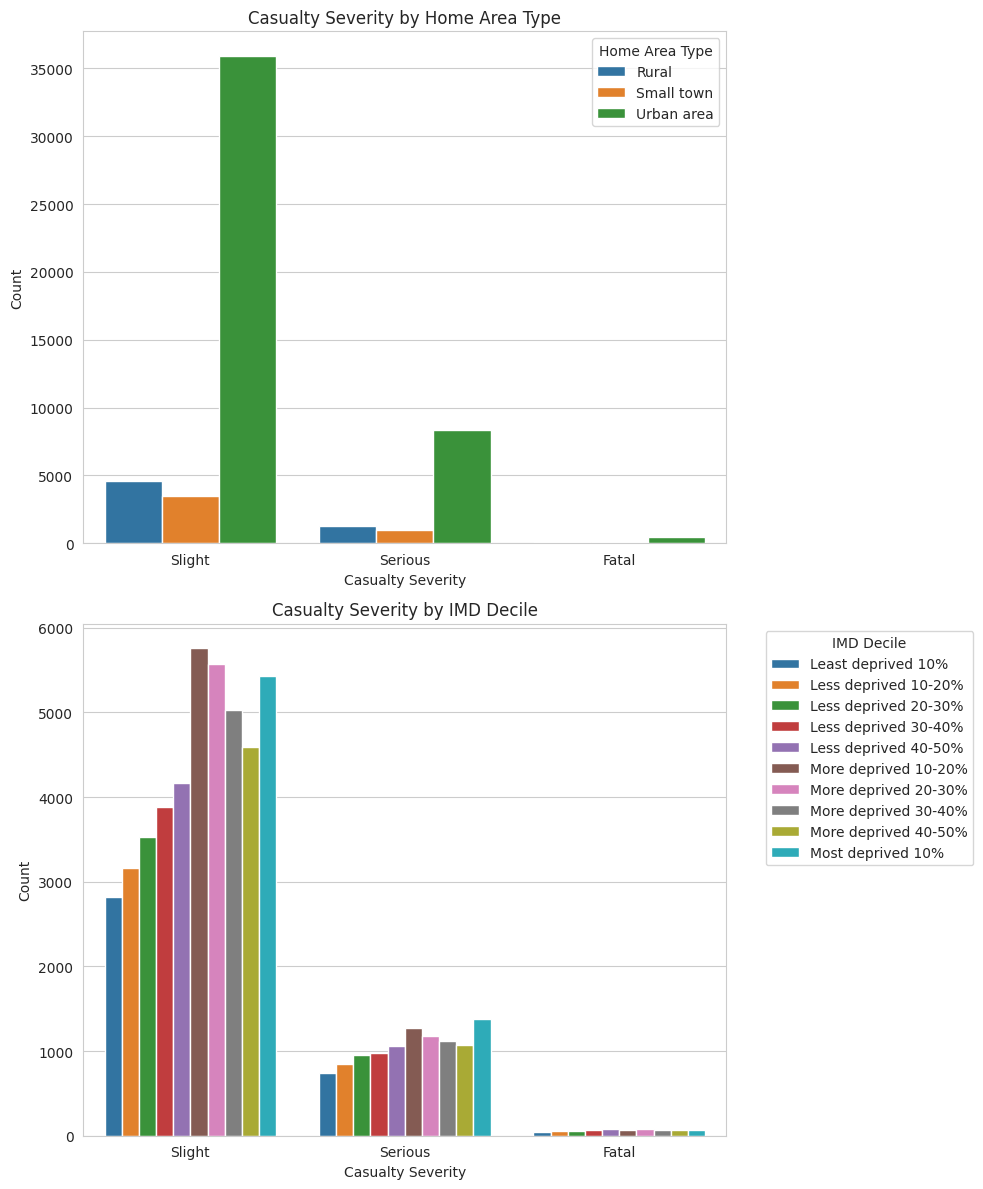

In [ ]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Distribution of Casualty Severity by Home Area Type
sns.countplot(x='casualty_severity', hue='casualty_home_area_type', data=df, ax=axes[0], order=['Slight', 'Serious', 'Fatal'])
axes[0].set_title('Casualty Severity by Home Area Type')
axes[0].set_xlabel('Casualty Severity')
axes[0].set_ylabel('Count')
axes[0].legend(title='Home Area Type')

# Distribution of Casualty Severity by IMD Decile
sns.countplot(x='casualty_severity', hue='casualty_imd_decile', data=df, ax=axes[1], order=['Slight', 'Serious', 'Fatal'])
axes[1].set_title('Casualty Severity by IMD Decile')
axes[1].set_xlabel('Casualty Severity')
axes[1].set_ylabel('Count')
axes[1].legend(title='IMD Decile', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show

In [ ]:
# Data Preprocessing
df.drop_duplicates(inplace=True)
df.drop(inplace=True, columns=['status', 'vehicle_reference',
                               'casualty_reference', 'accident_index',
                               'accident_year', 'accident_reference'])

# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55216 entries, 0 to 61351
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   casualty_class                      55216 non-null  category
 1   sex_of_casualty                     55216 non-null  category
 2   age_of_casualty                     55216 non-null  float64 
 3   age_band_of_casualty                55216 non-null  category
 4   casualty_severity                   55216 non-null  category
 5   pedestrian_location                 55216 non-null  category
 6   pedestrian_movement                 55216 non-null  category
 7   car_passenger                       55216 non-null  category
 8   bus_or_coach_passenger              55216 non-null  category
 9   pedestrian_road_maintenance_worker  55216 non-null  category
 10  casualty_type                       55216 non-null  category
 11  casualty_home_area_type     

# Data Splitting and Scaling:
The dataset is divided into training and testing sets, and feature scaling is performed to ensure model stability and convergence.

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop('casualty_severity', axis=1)
y = df['casualty_severity']

# Convert string labels to numerical labels
ordinal_encoder = OrdinalEncoder(categories=[['Fatal', 'Serious', 'Slight']])
y_encoded = ordinal_encoder.fit_transform(y.values.reshape(-1, 1))

# Use the encoded labels
y = y_encoded.flatten()

In [ ]:
# Handle remaining categorical features (excluding year)
categorical_features = X.select_dtypes(include=['category'])
label_encoder = LabelEncoder()
for col in categorical_features.columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality Reduction (PCA):
Principal Component Analysis (PCA) is applied for dimensionality reduction, capturing essential patterns in the data while reducing computational complexity.

In [ ]:
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA(n_components=10)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)

# Machine Learning Model Training and Evaluation:
A variety of classification algorithms, including Logistic Regression, Random Forest, Support Vector Machine, XGBoost, and Neural Network, are trained and evaluated using standard metrics such as accuracy, precision, recall, and F1-score.


--- Logistic Regression ---
              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00       127
     Serious       0.50      0.00      0.00      2089
      Slight       0.80      1.00      0.89      8828

    accuracy                           0.80     11044
   macro avg       0.43      0.33      0.30     11044
weighted avg       0.73      0.80      0.71     11044



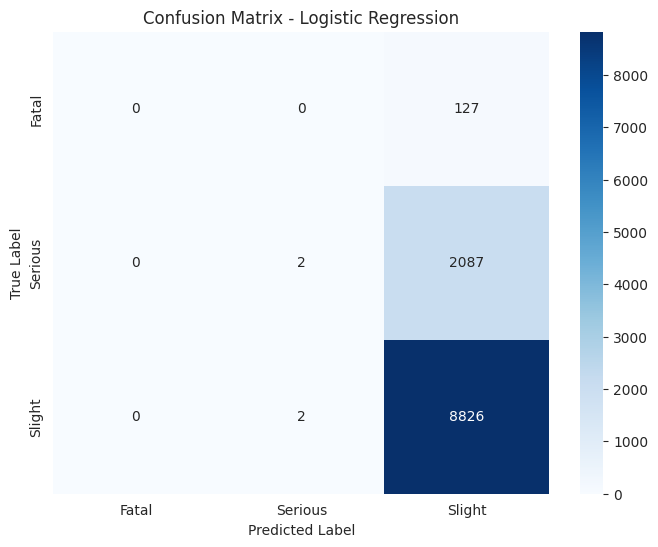

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Classification Report and Confusion Matrix for Logistic Regression
print("\n--- Logistic Regression ---")
y_pred_log_reg = log_reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred_log_reg, target_names=['Fatal', 'Serious', 'Slight']))
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, cmap='Blues', fmt='g', xticklabels=ordinal_encoder.categories_[0], yticklabels=ordinal_encoder.categories_[0])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



--- Random Forest ---
              precision    recall  f1-score   support

       Fatal       0.06      0.01      0.01       127
     Serious       0.31      0.14      0.19      2089
      Slight       0.81      0.93      0.86      8828

    accuracy                           0.77     11044
   macro avg       0.39      0.36      0.36     11044
weighted avg       0.71      0.77      0.73     11044



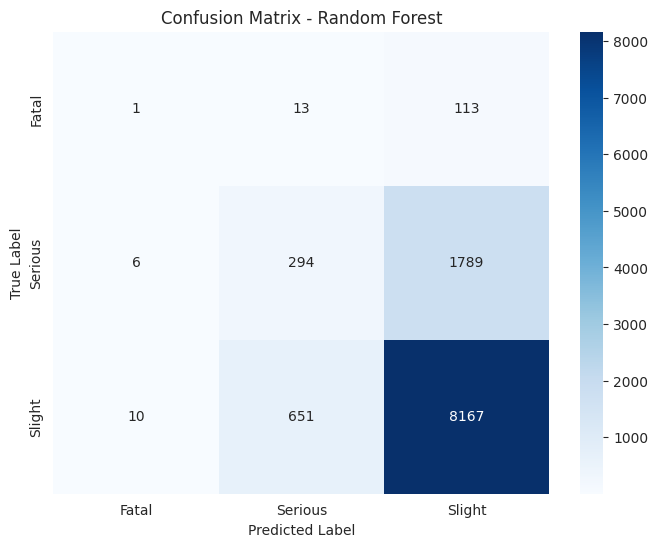

In [ ]:
rf_model = RandomForestClassifier()
# Train Random Forest
rf_model.fit(X_train_scaled, y_train)

# Classification Report and Confusion Matrix for Random Forest
print("\n--- Random Forest ---")
y_pred_rf = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf, target_names=['Fatal', 'Serious', 'Slight']))
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', xticklabels=ordinal_encoder.categories_[0], yticklabels=ordinal_encoder.categories_[0])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


--- Support Vector Machine ---
              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00       127
     Serious       1.00      0.00      0.00      2089
      Slight       0.80      1.00      0.89      8828

    accuracy                           0.80     11044
   macro avg       0.60      0.33      0.30     11044
weighted avg       0.83      0.80      0.71     11044



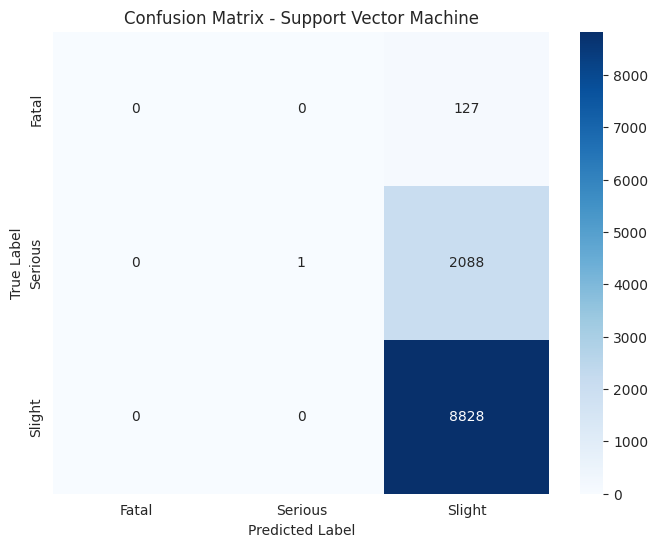

In [ ]:
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

# Classification Report and Confusion Matrix for Support Vector Machine
print("\n--- Support Vector Machine ---")
y_pred_svm = svm_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_svm, target_names=['Fatal', 'Serious', 'Slight']))
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='g', xticklabels=ordinal_encoder.categories_[0], yticklabels=ordinal_encoder.categories_[0])
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


--- XGBoost ---
              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00       127
     Serious       0.41      0.08      0.13      2089
      Slight       0.81      0.98      0.88      8828

    accuracy                           0.79     11044
   macro avg       0.41      0.35      0.34     11044
weighted avg       0.72      0.79      0.73     11044



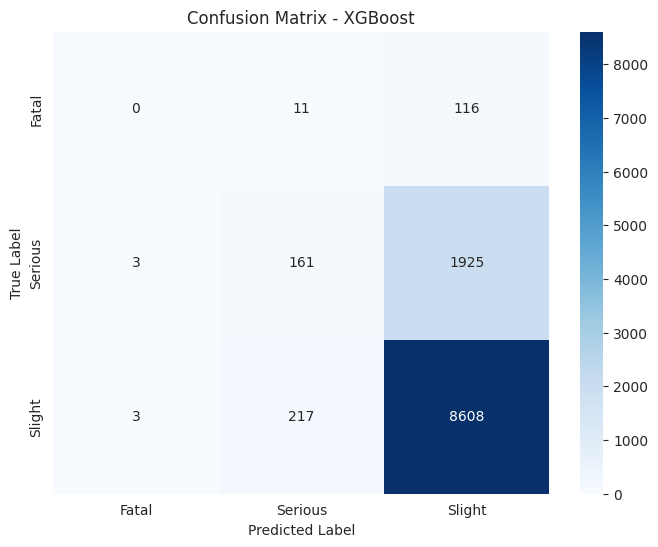

In [ ]:
# Initialize and train XGBoost
xgb_model = XGBClassifier(probability=True)
xgb_model.fit(X_train_scaled, y_train)

# Classification Report and Confusion Matrix for XGBoost
print("\n--- XGBoost ---")
y_pred_xgb = xgb_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_xgb, target_names=['Fatal', 'Serious', 'Slight']))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='g', xticklabels=ordinal_encoder.categories_[0], yticklabels=ordinal_encoder.categories_[0])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import legacy, Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Define the model
model = Sequential([
  Dense(128, activation='relu', input_shape=(10,)),  # Adjusted input shape to match your data
  Dropout(0.2),  # Dropout layer to prevent overfitting
  Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
  Dropout(0.2),  # Dropout layer
  Dense(3, activation='softmax')  # Output layer with 3 units (for 3 severity classes) and softmax activation
])

# Print model architecture summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 9859 (38.51 KB)
Trainable params: 9859 (38.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=legacy.Adam(),
              metrics=['accuracy'])
# Train the model (assuming you have validation data X_val_scaled and y_val)
model.fit(X_train_scaled, y_train, epochs=30, batch_size=32)

y_pred_nn = np.argmax(model.predict(X_test_scaled), axis=-1)

Epoch 1/30
1381/1381 [==============================] - 7s 3ms/step - loss: 0.5528 - accuracy: 0.7924
Epoch 2/30
1381/1381 [==============================] - 4s 3ms/step - loss: 0.5370 - accuracy: 0.7951
Epoch 3/30
1381/1381 [==============================] - 4s 3ms/step - loss: 0.5345 - accuracy: 0.7950
Epoch 4/30
1381/1381 [==============================] - 5s 3ms/step - loss: 0.5329 - accuracy: 0.7950
Epoch 5/30
1381/1381 [==============================] - 4s 3ms/step - loss: 0.5325 - accuracy: 0.7946
Epoch 6/30
1381/1381 [==============================] - 4s 3ms/step - loss: 0.5312 - accuracy: 0.7946
Epoch 7/30
1381/1381 [==============================] - 4s 3ms/step - loss: 0.5310 - accuracy: 0.7953
Epoch 8/30
1381/1381 [==============================] - 4s 3ms/step - loss: 0.5295 - accuracy: 0.7948
Epoch 9/30
1381/1381 [==============================] - 4s 3ms/step - loss: 0.5287 - accuracy: 0.7951
Epoch 10/30
1381/1381 [==============================] - 4s 3ms/step - loss: 0.527

# Model Performance Visualization (ROC Curve):
Receiver Operating Characteristic (ROC) curves are plotted to visualize model performance across different classification thresholds.

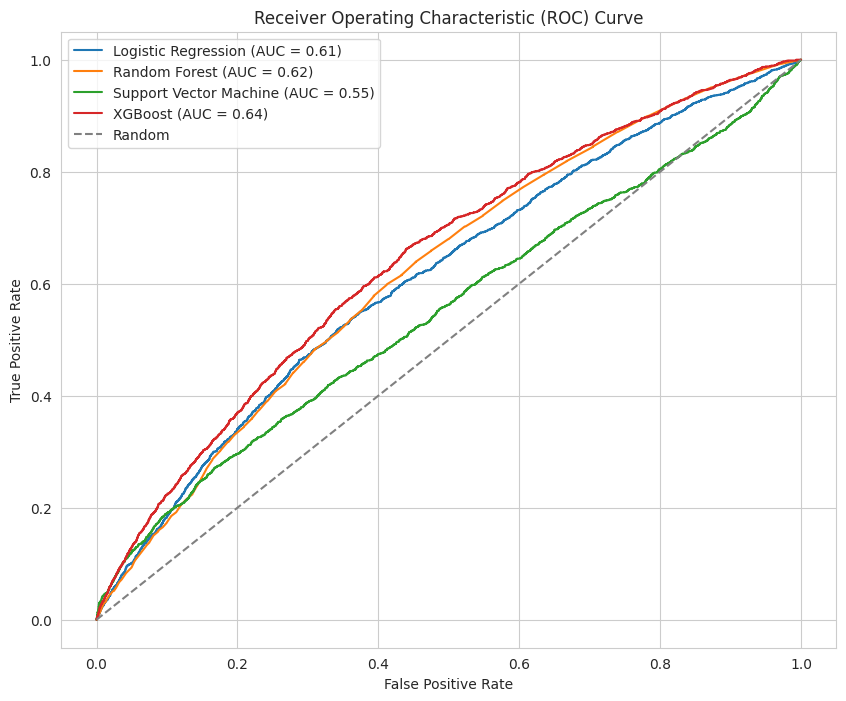

In [ ]:
model_names = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'XGBoost', 'Neural Network']
# ROC Curves
plt.figure(figsize=(10, 8))
for model, name in zip([log_reg, rf_model, svm_model, xgb_model], model_names):
    y_score = model.predict_proba(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_score[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Hyperparameter Tuning:
GridSearchCV is employed to systematically search for optimal hyperparameters, enhancing model generalization and performance.

In [ ]:
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
rf_params = {'n_estimators': [50, 100, 200, 300], 'max_depth': [None, 10, 20, 30]}
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Initialize GridSearchCV for each model
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_params, cv=5, verbose=1, n_jobs=-1)
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, verbose=1, n_jobs=-1)
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV models
log_reg_grid.fit(X_train_scaled, y_train)
rf_grid.fit(X_train_scaled, y_train)
svm_grid.fit(X_train_scaled, y_train)

# Get best parameters and best scores
log_reg_best_params = log_reg_grid.best_params_
rf_best_params = rf_grid.best_params_
svm_best_params = svm_grid.best_params_

log_reg_best_score = log_reg_grid.best_score_
rf_best_score = rf_grid.best_score_
svm_best_score = svm_grid.best_score_

print("Best parameters for Logistic Regression:", log_reg_best_params)
print("Best parameters for Random Forest:", rf_best_params)
print("Best parameters for Support Vector Machine:", svm_best_params)

print("Best accuracy score for Logistic Regression:", log_reg_best_score)
print("Best accuracy score for Random Forest:", rf_best_score)
print("Best accuracy score for Support Vector Machine:", svm_best_score)

# Initialize models with best parameters from GridSearchCV
log_reg_best = LogisticRegression(**log_reg_best_params, max_iter=1000)
rf_best = RandomForestClassifier(**rf_best_params)
svm_best = SVC(**svm_best_params)

# Train best models
log_reg_best.fit(X_train_scaled, y_train)
rf_best.fit(X_train_scaled, y_train)
svm_best.fit(X_train_scaled, y_train)

# Classification Reports for best models
best_models = [log_reg_best, rf_best, svm_best]
best_model_names = ['Logistic Regression (Best)', 'Random Forest (Best)', 'Support Vector Machine (Best)']
for model, name in zip(best_models, best_model_names):
    # Predictions
    y_pred_best = model.predict(X_test_scaled)

    # Classification Report
    print(f"\n--- Classification Report - {name} ---")
    print(classification_report(y_test, y_pred_best))

# Compare with models without hyperparameters
models_without_params = [log_reg, rf_model, svm_model]
model_names_without_params = ['Logistic Regression', 'Random Forest', 'Support Vector Machine']

# Plot comparison
plt.figure(figsize=(15, 8))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.barh(model_names_without_params, [log_reg.score(X_test_scaled, y_test), rf_model.score(X_test_scaled, y_test), svm_model.score(X_test_scaled, y_test)], color='lightblue', label='Without Hyperparameters')
plt.barh(best_model_names, [log_reg_best.score(X_test_scaled, y_test), rf_best.score(X_test_scaled, y_test), svm_best.score(X_test_scaled, y_test)], color='orange', label='With Hyperparameters')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.legend()

# F1-score comparison
plt.subplot(1, 2, 2)
plt.barh(model_names_without_params, [f1_score(y_test, log_reg.predict(X_test_scaled), average='weighted'), f1_score(y_test, rf_model.predict(X_test_scaled), average='weighted'), f1_score(y_test, svm_model.predict(X_test_scaled), average='weighted')], color='lightblue', label='Without Hyperparameters')
plt.barh(best_model_names, [f1_score(y_test, log_reg_best.predict(X_test_scaled), average='weighted'), f1_score(y_test, rf_best.predict(X_test_scaled), average='weighted'), f1_score(y_test, svm_best.predict(X_test_scaled), average='weighted')], color='orange', label='With Hyperparameters')
plt.xlabel('Weighted F1-score')
plt.title('Model F1-score Comparison')
plt.legend()

plt.tight_layout()
plt.show()